# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [ ]:
!pip install mnist 

#### Importing necessary libraries

In [73]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Preparing the Data

In [74]:
import mnist

In [75]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [76]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [77]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [78]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


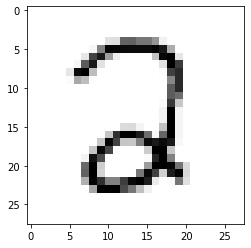

In [79]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [80]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [81]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [82]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [83]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [84]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [85]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [86]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [87]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [88]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [89]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [90]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [91]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======
Epoch 0, Loss 0.2539
Training Accuracy: 0.5709, Testing Accuracy: 0.5902

Epoch 10, Loss 0.1052
Training Accuracy: 0.8973, Testing Accuracy: 0.9083

Epoch 20, Loss 0.0641
Training Accuracy: 0.9317, Testing Accuracy: 0.9486

Epoch 30, Loss 0.0487
Training Accuracy: 0.9468, Testing Accuracy: 0.9567

Epoch 40, Loss 0.0412
Training Accuracy: 0.9537, Testing Accuracy: 0.9632

Epoch 50, Loss 0.0369
Training Accuracy: 0.9590, Testing Accuracy: 0.9632

Epoch 60, Loss 0.0339
Training Accuracy: 0.9620, Testing Accuracy: 0.9657

Epoch 70, Loss 0.0318
Training Accuracy: 0.9637, Testing Accuracy: 0.9677

Epoch 80, Loss 0.0301
Training Accuracy: 0.9649, Testing Accuracy: 0.9688

Epoch 90, Loss 0.0288
Training Accuracy: 0.9660, Testing Accuracy: 0.9698

Epoch 100, Loss 0.0276
Training Accuracy: 0.9679, Testing Accuracy: 0.9708

Epoch 110, Loss 0.0266
Training Accuracy: 0.9692, Testing Accuracy: 0.9703

Epoch 120, Loss 0.0258
Training Accuracy: 0.9701, Testing Accuracy: 0.

0.006616333611390654

### Logistic Regression based Implementation.

In [92]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [93]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2341
Training Accuracy: 0.6738, Testing Accuracy: 0.6547

Epoch 10, Loss 0.1051
Training Accuracy: 0.9024, Testing Accuracy: 0.9158

Epoch 20, Loss 0.0803
Training Accuracy: 0.9254, Testing Accuracy: 0.9385

Epoch 30, Loss 0.0689
Training Accuracy: 0.9357, Testing Accuracy: 0.9486

Epoch 40, Loss 0.0621
Training Accuracy: 0.9402, Testing Accuracy: 0.9546

Epoch 50, Loss 0.0575
Training Accuracy: 0.9437, Testing Accuracy: 0.9582

Epoch 60, Loss 0.0541
Training Accuracy: 0.9463, Testing Accuracy: 0.9607

Epoch 70, Loss 0.0515
Training Accuracy: 0.9486, Testing Accuracy: 0.9607

Epoch 80, Loss 0.0494
Training Accuracy: 0.9500, Testing Accuracy: 0.9612

Epoch 90, Loss 0.0477
Training Accuracy: 0.9511, Testing Accuracy: 0.9617

Epoch 100, Loss 0.0463
Training Accuracy: 0.9518, Testing Accuracy: 0.9617

Epoch 110, Loss 0.0451
Training Accuracy: 0.9523, Testing Accuracy: 0.9637

Epoch 120, Loss 0.044
Training Accuracy: 0.9531, Testing Accuracy

0.05008808995426443

### Comparing results of NN and LR

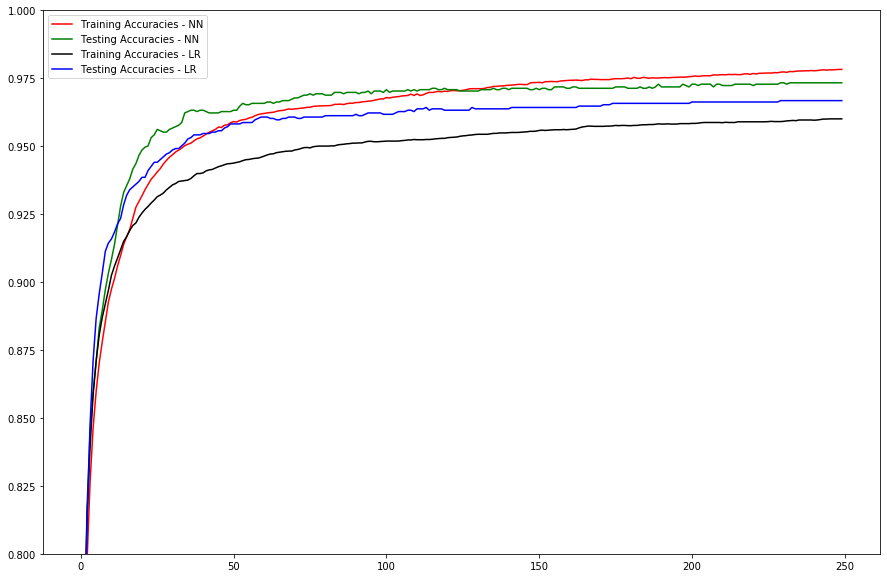

In [94]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [95]:
model_new = Model(layers[:-2])

In [96]:
plot_testing = model_new(testing_xdata)

In [1]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

NameError: name 'plt' is not defined

### Plotting probability contours

In [98]:
model_prob = Model(layers[-2:]) 

In [99]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

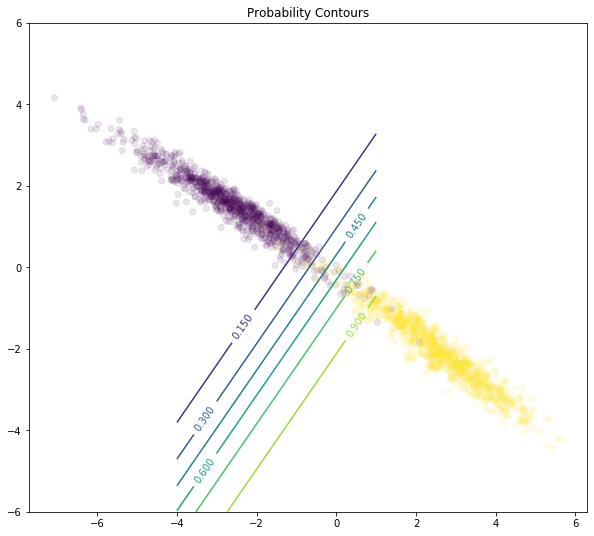

In [100]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );